# Análisis de Comportamiento de Usuarios de Tarjeta

## Carga y limpieza de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar dataset y ver como esta conformado
creditCards = pd.read_csv('/content/CC GENERAL.csv')
creditCards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Checar cuantos filas y columnas tiene
creditCards.shape

(8950, 18)

In [ ]:
# Que columnas tiene y si tenemos valores nulos
creditCards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## KPI 1 – Usuarios Responsables/Leales

In [ ]:
# Filtramos los usuarios responsables y creamos un nuevo DataFrame
usuariosResponsables = creditCards[(creditCards["PURCHASES"] > 0) & (creditCards["CASH_ADVANCE"] == 0) & (creditCards["PRC_FULL_PAYMENT"] > 0.8)]

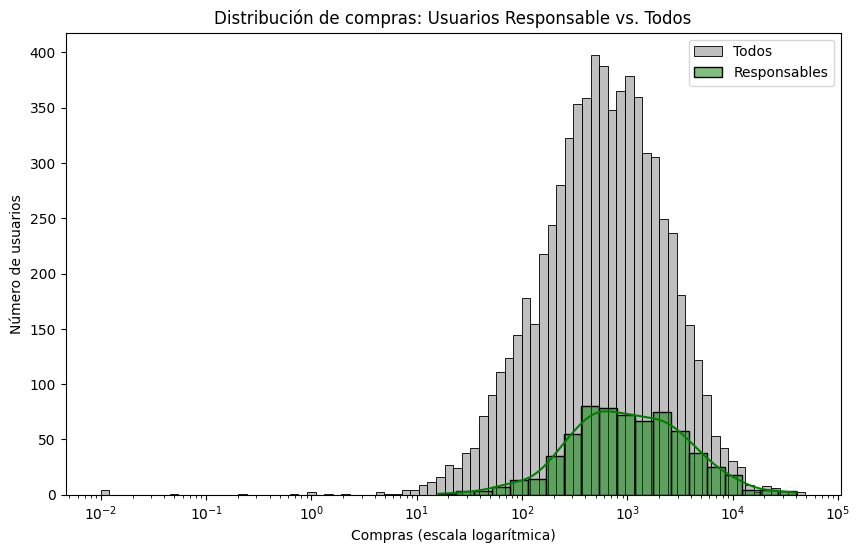

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(creditCards['PURCHASES'], color='gray', label='Todos', kde=True, log_scale=(True, False))
sns.histplot(usuariosResponsables['PURCHASES'], color='green', label='Responsables', kde=True, log_scale=(True, False))
plt.legend()
plt.title('Distribución de compras: Usuarios Responsable vs. Todos')
plt.xlabel('Compras (escala logarítmica)')
plt.ylabel('Número de usuarios')
plt.show()

Los usuarios responsables mantienen un comportamiento financiero predecible, con gastos controlados alrededor del rango medio del portafolio. No exploran ni los límites bajos ni altos de consumo. Esto indica autocontrol y posiblemente un ajuste natural o intencional en sus límites de crédito. Son clientes estables, pero de bajo riesgo financiero.


In [ ]:
# Creamos un nuevo DataFrame combinando ambos grupos
creditCards_boxplot = pd.concat([
    pd.DataFrame({'CREDIT_LIMIT': creditCards['CREDIT_LIMIT'], 'grupo': 'Todos'}), pd.DataFrame({'CREDIT_LIMIT': usuariosResponsables['CREDIT_LIMIT'], 'grupo': 'Responsables'})], ignore_index=True)

/tmp/ipython-input-7-1254801831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grupo', y='CREDIT_LIMIT', data=creditCards_boxplot, palette=['gray', 'green'])


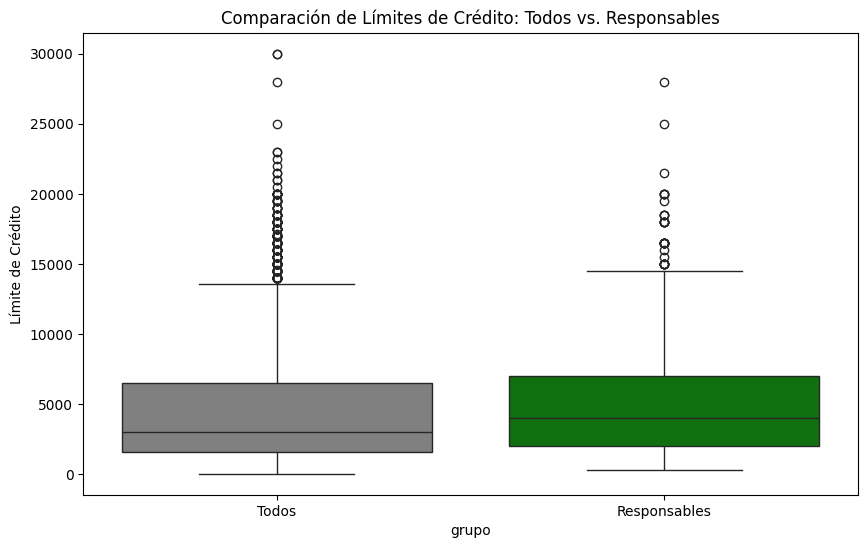

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grupo', y='CREDIT_LIMIT', data=creditCards_boxplot, palette=['gray', 'green'])
plt.title('Comparación de Límites de Crédito: Todos vs. Responsables')
plt.ylabel('Límite de Crédito')
plt.show()

Mi **hipótesis inicial** de que los límites de crédito bajos fomentan comportamiento responsable no se sostiene totalmente con estos datos.
Aunque los responsables gastan menos y pagan mejor, no necesariamente es porque tengan límites más bajos; podría deberse a factores como autocontrol, educación financiera o antigüedad como clientes.

## KPI 2 – Usuarios Riesgosos/Peligrosos

In [ ]:
# Creamos un nuevo DataFrame para juntar valores de riesgo
usuariosRiesgosos = creditCards[(creditCards['CASH_ADVANCE'] > 0) & (creditCards['PRC_FULL_PAYMENT'] < 0.2) & (creditCards['MINIMUM_PAYMENTS'] < creditCards['BALANCE'])]

In [ ]:
# Cuantos usuarios riesgosos y su porcentaje
print(f"Total usuarios: {creditCards.shape[0]}")
print(f"Usuarios riesgosos: {usuariosRiesgosos.shape[0]}")
print(f"Porcentaje riesgosos: {(usuariosRiesgosos.shape[0] / creditCards.shape[0]) * 100:.2f}%")

Total usuarios: 8950
Usuarios riesgosos: 3540
Porcentaje riesgosos: 39.55%


In [ ]:
usuariosRiesgosos.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3539.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,2685.653627,0.954529,566.779452,349.922992,216.897107,2103.548854,0.296367,0.141744,0.206885,0.294728,7.087006,9.187006,4789.328150,1896.868853,923.530846,0.016453,11.442373
std,2361.045751,0.123373,1216.964753,876.598797,591.845489,2568.776027,0.377915,0.243484,0.341146,0.207463,8.806468,19.699065,3651.612384,2651.867720,940.690102,0.040996,1.418726
min,0.422555,0.125000,0.000000,0.000000,0.000000,14.222216,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,300.000000,9.040017,0.311953,0.000000,6.000000
25%,1060.379804,1.000000,0.000000,0.000000,0.000000,453.147392,0.000000,0.000000,0.000000,0.166667,2.000000,0.000000,1800.000000,525.135073,331.246557,0.000000,12.000000
50%,1855.768730,1.000000,49.045000,0.000000,0.000000,1306.147189,0.083333,0.000000,0.000000,0.250000,4.000000,1.000000,3500.000000,1066.517072,610.504915,0.000000,12.000000
75%,3652.432668,1.000000,600.000000,286.635000,174.970000,2805.212854,0.583333,0.166667,0.333333,0.416667,9.000000,11.000000,7000.000000,2089.460036,1183.662320,0.000000,12.000000
max,16304.889250,1.000000,14686.100000,14215.000000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,40627.595240,12245.926010,0.181818,12.000000


La antigüedad **NO** parece ser un diferenciador fuerte entre responsables y riesgosos.
Los riesgosos son clientes con historial pero con hábitos peligrosos: retiran mucho efectivo, acumulan saldo y nunca pagan el total, aunque su límite no es especialmente alto ni bajo.

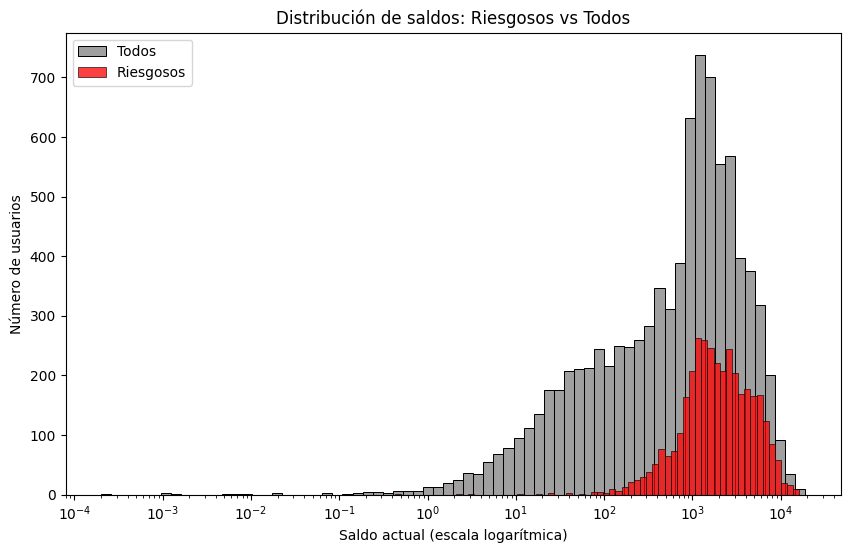

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(creditCards['BALANCE'], color='gray', label='Todos', kde=False, log_scale=(True, False))
sns.histplot(usuariosRiesgosos['BALANCE'], color='red', label='Riesgosos', kde=False, log_scale=(True, False))
plt.legend()
plt.title('Distribución de saldos: Riesgosos vs Todos')
plt.xlabel('Saldo actual (escala logarítmica)')
plt.ylabel('Número de usuarios')
plt.show()

In [ ]:
# Calculamos percentiles de BALANCE para usuarios riesgosos
percentiles = usuariosRiesgosos['BALANCE'].quantile([0.50, 0.75, 0.90, 0.95, 0.99])
print("Percentiles de saldo en usuarios riesgosos:")
print(percentiles)

Percentiles de saldo en usuarios riesgosos:
0.50     1855.768730
0.75     3652.432668
0.90     5925.930142
0.95     7422.675785
0.99    11019.908039
Name: BALANCE, dtype: float64


In [ ]:
# Definimos el umbral crítico
umbral_critico = percentiles.loc[0.90]

# Marcamos usuarios riesgosos con saldo por encima del umbral crítico
riesgo_critico = usuariosRiesgosos[usuariosRiesgosos['BALANCE'] > umbral_critico]

# Calculamos cuántos representan y su porcentaje
n_critico = riesgo_critico.shape[0]
pct_critico = n_critico / creditCards.shape[0] * 100

print(f"Usuarios con saldo > 90 percentil (>{umbral_critico:.0f} pesos): {n_critico} clientes")
print(f"Esto equivale al {pct_critico:.2f}% de toda la base de usuarios")

Usuarios con saldo > 90 percentil (>5926 pesos): 354 clientes
Esto equivale al 3.96% de toda la base de usuarios


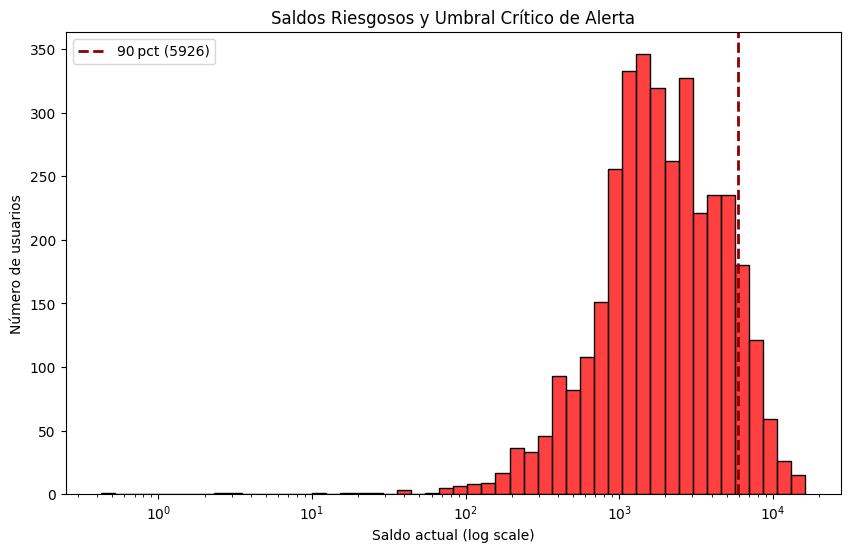

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(usuariosRiesgosos['BALANCE'], bins=50, color='red', log_scale=(True, False))
plt.axvline(umbral_critico, color='darkred', linestyle='--', linewidth=2, label=f'90 pct ({umbral_critico:.0f})')
plt.legend()
plt.title('Saldos Riesgosos y Umbral Crítico de Alerta')
plt.xlabel('Saldo actual (log scale)')
plt.ylabel('Número de usuarios')
plt.show()

El 10% de los usuarios riesgosos (≈ 354 clientes) acumula saldos superiores a ~5 926 pesos. Estos deberían entrar en una campaña de recordatorio de pago o en un esquema de límites dinámicos para mitigar la exposición financiera.

## KPI 3 – Usuarios al Límite (Premium & Churn)

In [ ]:
churn = creditCards[creditCards['PURCHASES_FREQUENCY'] < 0.2]

In [ ]:
total = creditCards.shape[0]
n_churn = churn.shape[0]
pct_churn = n_churn / total * 100
print(f"Usuarios en riesgo de churn: {n_churn} ({pct_churn:.2f}%)")

Usuarios en riesgo de churn: 3274 (36.58%)


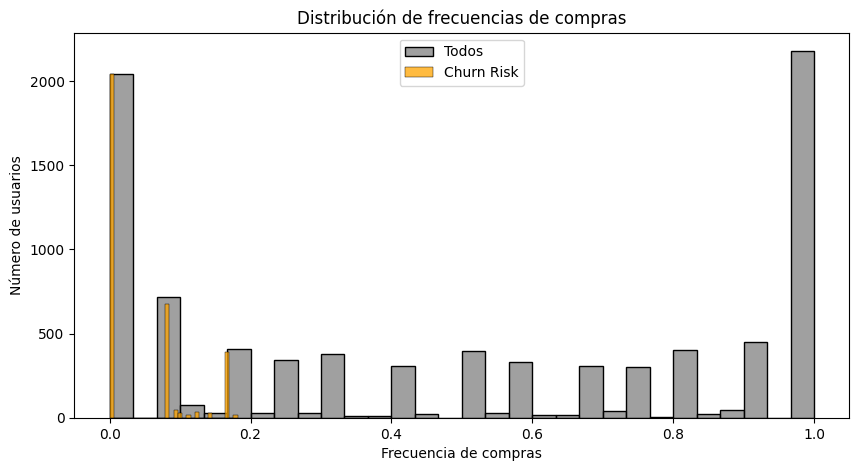

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(creditCards['PURCHASES_FREQUENCY'], bins=30, color='gray', label='Todos')
sns.histplot(churn['PURCHASES_FREQUENCY'], bins=30, color='orange', label='Churn Risk')
plt.legend()
plt.title('Distribución de frecuencias de compras')
plt.xlabel('Frecuencia de compras')
plt.ylabel('Número de usuarios')
plt.show()

El 36.6 % de los clientes (3 274 usuarios) tiene una frecuencia de compra inferior a 0.2, lo que indica riesgo real de abandono. Estos usuarios practicamente no interactúan con el producto.

In [ ]:
churn['TENURE'].describe()

,TENURE
count,3274.000000
mean,11.409896
std,1.450467
min,6.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,12.000000


El abandono tiende a suceder alrededor del mes 12. Para reducir churn, se deberían desplegar campañas de reactivación o incentivos antes de cumplir el año (idealmente en el mes 6–9) para enganchar de nuevo a estos usuarios.

In [ ]:
compras_p75 = creditCards['PURCHASES'].quantile(0.75)
print(f"Percentil 75 de PURCHASES: {compras_p75:.2f}")

usuariosPremium = creditCards[(creditCards['PURCHASES'] > compras_p75) & (creditCards['PRC_FULL_PAYMENT'] > 0.9)]

n_premium = usuariosPremium.shape[0]
pct_premium = n_premium / creditCards.shape[0] * 100
print(f"Usuarios premium: {n_premium} ({pct_premium:.2f}%)")

Percentil 75 de PURCHASES: 1110.13
Usuarios premium: 256 (2.86%)


In [ ]:
usuariosPremium.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,401.486104,0.947662,4278.677930,2786.028711,1492.649219,62.024579,0.916772,0.630384,0.654577,0.013184,0.312500,46.996094,7244.140625,4280.560825,219.412154,0.979551,11.804688
std,489.586889,0.123748,5005.239392,4115.254980,1879.383340,322.487012,0.168497,0.386200,0.379967,0.067809,2.300043,45.182549,4894.547271,4707.779117,248.250527,0.036266,0.941910
min,21.311946,0.363636,1117.350000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,4.000000,500.000000,455.527411,45.434563,0.909091,6.000000
25%,157.946236,1.000000,1858.155000,559.965000,292.395000,0.000000,0.916667,0.250000,0.416667,0.000000,0.000000,20.000000,3800.000000,1795.803474,166.496549,1.000000,12.000000
50%,246.020633,1.000000,2628.180000,1678.025000,1147.500000,0.000000,1.000000,0.763889,0.833333,0.000000,0.000000,34.500000,6000.000000,2815.167990,178.711393,1.000000,12.000000
75%,447.417313,1.000000,4592.085000,3336.375000,1868.272500,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.250000,9700.000000,4595.106281,195.660823,1.000000,12.000000
max,4010.621974,1.000000,40040.710000,33803.840000,15497.190000,2768.260223,1.000000,1.000000,1.000000,0.833333,33.000000,358.000000,25000.000000,35843.625930,2494.776569,1.000000,12.000000


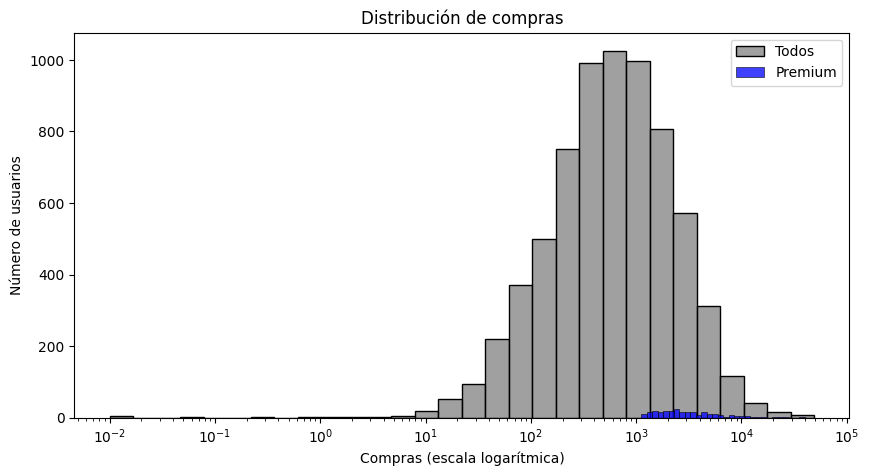

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(creditCards['PURCHASES'], bins=30, color='gray', label='Todos', log_scale=(True, False))
sns.histplot(usuariosPremium['PURCHASES'], bins=30, color='blue', label='Premium', log_scale=(True, False))
plt.legend()
plt.title('Distribución de compras')
plt.xlabel('Compras (escala logarítmica)')
plt.ylabel('Número de usuarios')
plt.show()

Este 2.86 % de la cartera (256 usuarios) representa el núcleo de alto valor: gastan mucho, pagan siempre completo, usan poco su saldo disponible y son clientes maduros.

## Exportar datasets

In [ ]:
import os
os.makedirs('data', exist_ok=True)

# Exportar dataset completo (opcional)
creditCards.to_csv('data/credit_cards_full.csv', index=False)

# Exportar usuarios responsables
usuariosResponsables.to_csv('data/usuarios_responsables.csv', index=False)

# Exportar usuarios riesgosos
usuariosRiesgosos.to_csv('data/usuarios_riesgosos.csv', index=False)

# Exportar usuarios premium
usuariosPremium.to_csv('data/usuarios_premium.csv', index=False)

# Exportar usuarios churn risk
churn.to_csv('data/usuarios_churn.csv', index=False)